# Assignment 0: Data Exploration

An important first step to every data analysis project is to explore your data. Data exploration helps you become familiar with your data, find noise and outliers, clean your data, and prepare your data for data mining. It is important that have a good understanding of what is in your data. 

## Part 1: Leaf Dataset

For this task we'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

You can find more information about the dataset [here](http://archive.ics.uci.edu/ml/datasets/Leaf).

<img src="imgs/screen4.png">

In [2]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

pd.__version__ #print which version of pandas you're using

'0.25.1'

Read in the dataset. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [3]:
leaf_data = pd.read_csv("leaf.csv")
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,NaN,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q1. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. How many missing values are there in this column?

In [4]:
# your code goes here
missing = list(leaf_data['eccentricity'].isnull())
missing_count = missing.count(True)
print(f"There are {missing_count} values missing in the eccentricity column.")

There are 5 values missing in the eccentricity column.


Q2. Fill in these missing values with something reasonable. Show the head of the dataframe.

In [5]:
# your code goes here
ecc = leaf_data['eccentricity']
median = ecc.median()
leaf_data['eccentricity'] = ecc.fillna(median)
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.51247,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


Q3. Standardize the `eccentricity` column. Where `value_std = (value - mean(value)) / std(value)`. Display the head of the new data frame.

NOTE: You will want to add standardized eccentricity as a new column, rather than overwriting the existing eccentricty values with the standardized values. If you replace the original eccentricy values with the standardized ones, then happen to run the below code cell more than once, you will end up standardizing already standardized values, resulting in garbage numbers in that column. By adding a new column for the standardized eccentricity values, if the code cell is run multiple times, it will always be standardizing the original values in the eccentricty column. 

In [6]:
# your code goes here
# calculate necessary values
mean = ecc.mean()
stdv = ecc.std()

# apply to column
stdiz = lambda n : (n-mean)/stdv
ecc_std = [stdiz(n) for n in ecc]

leaf_data['eccentricity_std'] = ecc_std
leaf_data.head()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy,eccentricity_std
0,1,0.51247,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000,-0.204757
1,4,0.99512,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514,1.781210
2,3,0.19287,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110,-1.519819
3,1,0.52212,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809,-0.165050
4,3,0.33254,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660,-0.945117


Q4. Create a scatter plot between `smoothness` and standardized `eccentricity`. Place `smoothness` on the X axis.

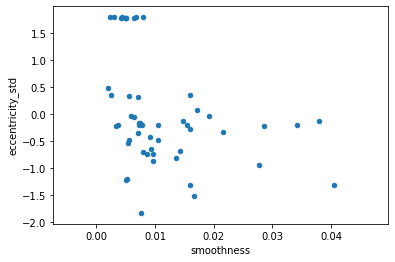

In [7]:
# your code goes here
leaf_data.plot.scatter(x='smoothness', y='eccentricity_std')

Q5. Now plot the same scatter plot as Q4 but give a different color to each `class` label. What can you infer from this plot? (Provide a short answer in the form of comments.)

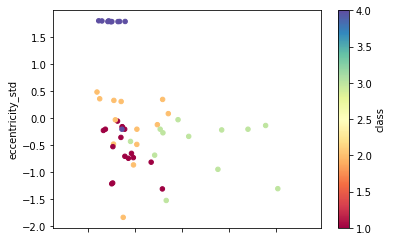

In [8]:
# your code goes here
"""
The classes each cluster into different groups with respect to eccentricity and smoothness.
Class 1 has lower values of both parameters, clustered in the bottom left of the plot.
Class 2 has a similar central tendency, with more dispersion w/ regard to eccentricity, tending towards
slightly higher values than class 1.
Class 3 has similar average eccentricity to class 2, but is more widely dispersed w/ regard to smoothness.
Class 4 is rather tightly grouped, having much higher standardized eccentricity than the other classes
and about the same smoothness as classes 1 and 2. One outlier belonging to class for is nestled in the area
where classes 1 and 2 are concentrated, being much less eccentric than other members of class 4.
"""
leaf_data.plot(x='smoothness', y='eccentricity_std', c='class', kind='scatter', colormap='Spectral')

Q6. Calculate the correlation coefficient between the standardized `eccentricity` and the `smoothness` column. What does this number tell us? (Provide a short answer in the form of comments.)

In [9]:
# your code goes here
"""
This shows that leaves with lower eccentricity are more likely to be round, and leaves that are less round
are more likely to be eccentric in shape.
"""

leaf_data[['eccentricity','smoothness']].corr().loc['eccentricity', 'smoothness']

-0.3634114021615544

Q7. Create a plot to determine if there are any outliers in the `average-contrast` attribute.

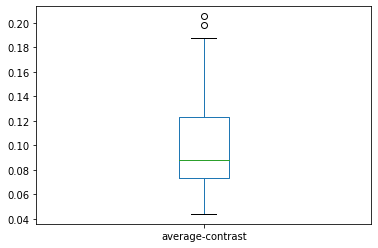

In [10]:
# your code goes here
leaf_data['average-contrast'].plot(kind='box')

## Part 2: Adult Census Dataset

For this task we'll be using the 1994 Adult Census Income data (`adult.csv`) collected by Ronny Kohavi and Barry Becker. This is a reasonably clean dataset with both categorical and integer attributes. The dataset consists of `32.5K` rows with 14 attributes.

#### Attributes

You can find a detailed description of the dataset [here](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).

| Attribute Name 		| Type 				|
| --------------------- | ----------------- |
| age					| continuous		|
| workclass				| categorical		|
| fnlwgt				| continuous		|
| education 			| categorical		|
| education-num			| categorical		|
| marital-status		| categorical		|
| occupation			| categorical		|
| relationship			| categorical		|
| race					| categorical		|
| sex					| categorical		|
| capital-gain			| continuous		|
| capital-loss			| continuous		|
| hours-per-week		| continuous		|
| native-country		| categorical		|

Read in the data. You can find more on reading CSV (Comma Separated Value) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [11]:
# add skipinitialspace=True to skip spaces after delimiter (will be required later for the map function)
adult_data = pd.read_csv("adult.csv", skipinitialspace=True)
# show the head of the data (first 5 values)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# display data types of various columns in the dataframe
adult_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Q8. Show the distribution of the dataset with respect to the `education` column. Choose a plot that is suitable to show this.

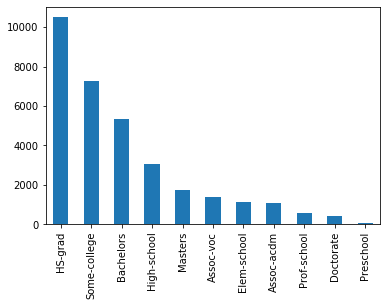

In [13]:
# your code here
adult_data['education'].value_counts().plot(kind='bar')

Q9.
* Group the `adult_data` using the `marital-status` column. You may want to look at the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).
* Display the mean, median and standard deviation statistics of `hours-per-week` column for each `marital-status` column.
* As a comment, note which marital status category has the maximum average work hours per week? Which has the most variability in work hours per week? 

In [14]:
# your code here
grp = adult_data.groupby(['marital-status'])
mean=grp.mean()
median=grp.median()
stdev=grp.std()
"""
Married-civ-spouse has the highest average hours worked per week.
Married-AF-spouse has the greatest variability in hours worked per week.
"""
print(f"Mean:\n{mean}\n\nMedian:\n{median}\n\nStandard Deviation:\n{stdev}")

Mean:
                             age         fnlwgt  education-num  capital-gain  \
marital-status                                                                 
Divorced               43.041639  185802.790457      10.030385    728.414810   
Married-AF-spouse      32.478261  188165.565217      10.173913    432.652174   
Married-civ-spouse     43.247596  186763.172877      10.320646   1764.859509   
Married-spouse-absent  40.578947  193141.760766       9.308612    653.983254   
Never-married          28.150988  195383.308996       9.962464    376.588318   
Separated              39.354146  206444.325854       9.293659    535.568780   
Widowed                58.975831  174159.042296       9.093656    571.071501   

                       capital-loss  hours-per-week  
marital-status                                       
Divorced                  64.600720       41.246680  
Married-AF-spouse          0.000000       41.130435  
Married-civ-spouse       122.439103       43.284856  
Mar

In [15]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Other',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
    '?' : 'Other'
}

Q10. Using the dictionary provided above, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [16]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = adult_data.copy()
# add the new column to adult_data_copy
# your code goes here
adult_data_copy['continent'] = adult_data['native-country'].map(continent_dict)
adult_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,continent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53,Private,234721,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Use matplotlib to plot a bar graph showing the average age of adults from each continent, and show the standard deviation on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen3.png" width=400>

<BarContainer object of 5 artists>

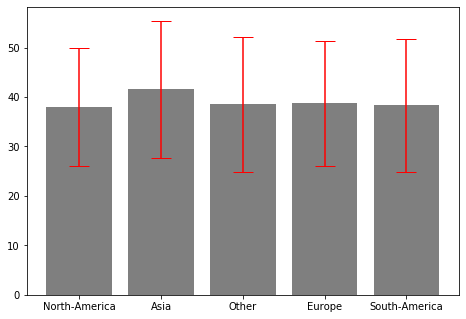

In [17]:
# your code goes here
fig = plt.figure()
fig = fig.add_axes([0,0,1,1])
conts = adult_data_copy['continent']
by_cont = adult_data_copy.groupby(['continent'])

x = list(conts.unique())
mean = by_cont.mean()
stdev = by_cont.std()
y = [mean.at[c, 'age'] for c in mean.index]
yerr = [stdev.at[c, 'age'] for c in mean.index]
fig.bar(x, y, yerr=yerr, alpha=0.5, color='black', ecolor='red', capsize=10)

Q12. To reduce the dimensionality of this dataset, which attribute or attributes would you eliminate? Explain why.

In [74]:
'''Explain why here (as a comment):
The row 'education' can be dropped, as 'education-num' contains the same data w/ greater
specificity. Two of the following labels from the column 'education' correspond to a range 
of values in 'education-num', others have an exact correspondence.
* preschool - 1
* elem-school - 2-4
* high-school - 5-8
* HS-grad - 9
* some-college - 10
* assoc-voc - 11
* assoc-acdm - 12
* bachelors - 13
* masters - 14
* prof-school - 15
* doctorate - 16

The columns 'capital-gain' and 'capital-loss' only have (non-zero) data-points for 8.33% and
4.67% of entries in the data set respectively, thus they should be eliminated unless one
wished to focus on only the population with meaningful data for each column respectively.

The columns 'relationship' and 'marital-status' have some overlap. 'Husband' and
'Wife' both correspond to 'Married-civ-spouse' and 'Married-AF-spouse', and the difference
between the categories 'Husband' and 'Wife' is encoded in the column 'sex'.

I assume that entries with 'Not-in-family', 'Own-child' and 'Unmarried' for relationship
that also have 'Married-civ-spouse' or 'Married-AF-spouse' have been entered as errors
and should have 'Married-spouse-absent' as their datum for marital status.

If this is the case, the labels 'Married-civ-spouse' and 'Married-AF-spouse' are more
specific than their correlates 'Husband' and 'Wife' under 'relationship.' All other labels
in 'relationship' correspond to all other labels in 'marital-status'. Thus, if either of
these were dropped, it would remove information from the dataframe, but it could possibly
have less of an impact than most other columns.
'''

0.0466509013850926